In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# %matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

Text(0.5, 1.0, 'Exercise 1')

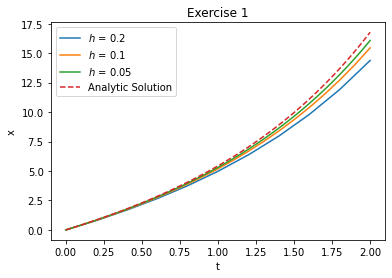

In [16]:
def euler(f,x0,t,h):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method: x[i] = x[i-1] + delta_t*f(x[i-1])
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
        h (float): time step
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    x = np.empty(len(t))
    x[0] = x0
    for i in range(0, len(t)-1):
        x[i+1] = x[i] + h*f(x[i], t[i])
    
    return x
    
# Set initial variables and functions
analytic = lambda t: -2 + 2*t + 2*np.e**t    
f = lambda x_t, t: x_t - 2*t + 4
x0 = 0
t0 = 0
tf = 2


# find 3 approximations
h1 = 0.2
h2 = 0.1
h3 = 0.05
t_span1 = np.linspace(t0, tf, int((tf-t0)/h1)+1)
t_span2 = np.linspace(t0, tf, int((tf-t0)/h2)+1)
t_span3 = np.linspace(t0, tf, int((tf-t0)/h3)+1)

sol1 = euler(f, x0, t_span1, h1)
sol2 = euler(f, x0, t_span2, h2)
sol3 = euler(f, x0, t_span3, h3)

# plot solutions with analytic
plt.plot(t_span1, sol1, label='$h$ = 0.2')
plt.plot(t_span2, sol2, label='$h$ = 0.1')
plt.plot(t_span3, sol3, label='$h$ = 0.05')
plt.plot(np.linspace(0, 2, 100), analytic(np.linspace(0, 2, 100)), '--', 
         label='Analytic Solution')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Exercise 1')



## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [14]:
def midpoint(f,x0,t, h):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    x = np.empty(len(t))
    x[0] = x0
    for i in range(0, len(t)-1):
        x[i+1] = x[i] + h*f(x[i] + h/2*f(x[i], t[i]), t[i] + h/2)
    
    return x

def rk4(f,x0,t,h):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    x = np.empty(len(t))
    x[0] = x0
    for i in range(0, len(t)-1):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + h/2*k1, t[i] + h/2)
        k3 = f(x[i] + h/2*k2, t[i] + h/2)
        k4 = f(x[i] + h*k3, t[i+1])
        x[i+1] = x[i] + h/6*(k1 + 2*k2 + 2*k3 + k4)
    
    return x



Text(0.5, 1.0, 'Exercise 2')

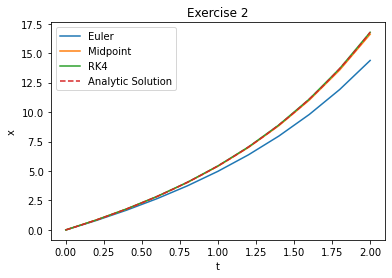

In [17]:
# Set initial variables and functions
analytic = lambda t: -2 + 2*t + 2*np.e**t    
f = lambda x_t, t: x_t - 2*t + 4
x0 = 0
t0 = 0
tf = 2


# find 3 approximations for h=0.2 with 3 methods
h1 = 0.2
h2 = 0.2
h3 = 0.2
t_span1 = np.linspace(t0, tf, int((tf-t0)/h1)+1)
t_span2 = np.linspace(t0, tf, int((tf-t0)/h2)+1)
t_span3 = np.linspace(t0, tf, int((tf-t0)/h3)+1)

sol1 = euler(f, x0, t_span1, h1)
sol2 = midpoint(f, x0, t_span2, h2)
sol3 = rk4(f, x0, t_span3, h3)

# plot solutions with analytic
plt.plot(t_span1, sol1, label='Euler')
plt.plot(t_span2, sol2, label='Midpoint')
plt.plot(t_span3, sol3, label='RK4')
plt.plot(np.linspace(0, 2, 100), analytic(np.linspace(0, 2, 100)), '--', 
         label='Analytic Solution')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Exercise 2')

Text(0.5, 1.0, 'Exercise 2')

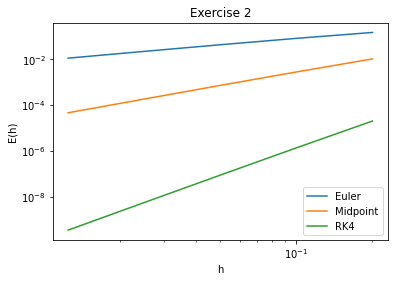

In [19]:
## Track error at different h-values @ t=2

true_val = analytic(2.0)

# create error arrays for each method
error_euler = []
error_midpoint = []
error_rk4 = []

# go through each t_value and compute error
h_vals = [0.2, 0.1, 0.05, 0.025, 0.0125] 
for h1 in h_vals:
    h2 = h1
    h3 = h1
    t_span1 = np.linspace(t0, tf, int((tf-t0)/h1)+1)
    t_span2 = np.linspace(t0, tf, int((tf-t0)/h2)+1)
    t_span3 = np.linspace(t0, tf, int((tf-t0)/h3)+1)

    sol1 = euler(f, x0, t_span1, h1)
    sol2 = midpoint(f, x0, t_span2, h2)
    sol3 = rk4(f, x0, t_span3, h3)

    error_euler.append(np.abs(true_val-sol1[-1])/np.abs(true_val))
    error_midpoint.append(np.abs(true_val-sol2[-1])/np.abs(true_val))
    error_rk4.append(np.abs(true_val-sol3[-1])/np.abs(true_val))

# plot
plt.loglog(h_vals, error_euler, label='Euler')
plt.loglog(h_vals, error_midpoint, label='Midpoint')
plt.loglog(h_vals, error_rk4, label='RK4')

plt.legend(loc='best')
plt.xlabel('h')
plt.ylabel('E(h)')
plt.title('Exercise 2')


## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

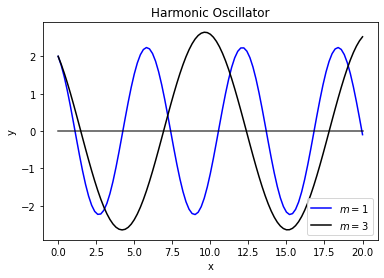

In [34]:
def rk4_vector(f,x0,t,h):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
        h (float): time step
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    x = np.empty((len(t), len(x0)))
    x[0, :] = x0
    for i in range(0, len(t)-1):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + h/2*k1, t[i] + h/2)
        k3 = f(x[i] + h/2*k2, t[i] + h/2)
        k4 = f(x[i] + h*k3, t[i+1])
        x[i+1] = x[i] + h/6*(k1 + 2*k2 + 2*k3 + k4)
    
    return x

# Set initial variables and functions
f_1_1 = lambda x, t: np.array([x[1], -1*1/1*x[0]]) # where k=m=1
f_3_1 = lambda x, t: np.array([x[1], -1*1/3*x[0]]) # where k=m=1
x0 = np.array([2, -1])
t0 = 0
tf = 20


# find approximations for h=0.2 with for (m,k) = (1,1) and (3,1)
h = 0.2
t_span = np.linspace(t0, tf, int((tf-t0)/h)+1)

sol1 = rk4_vector(f_1_1, x0, t_span, h)
sol2 = rk4_vector(f_3_1, x0, t_span, h)

# plot solutions with analytic
plt.plot(t_span, sol1[:, 0], label='$m=$1', color='blue')
plt.plot(t_span, sol2[:, 0], label='$m=$3', color='black')
plt.plot(t_span, 0*t_span, color='black', alpha=0.7)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Harmonic Oscillator')
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

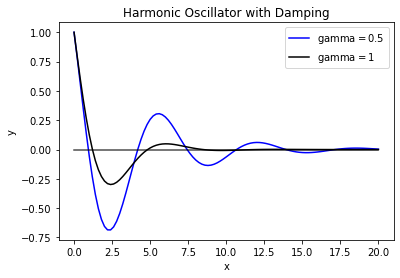

In [39]:
# Set initial variables and functions
# Because of damping, we have
#  f (x) = [x[1], -k/m*x[0]-gamma/m*x[1]]

f_1_1_half = lambda x, t: np.array([x[1], -1*x[0] - 0.5*x[1]]) # k=m=1,gamma=0.5
f_1_1_1 = lambda x, t: np.array([x[1], -1*x[0] - 1*x[1]]) # where k=m=gamma=1
x0 = np.array([1, -1])
t0 = 0
tf = 20


# find approximations for h=0.2 with for (m,k) = (1,1) and (3,1)
h = 0.2
t_span = np.linspace(t0, tf, int((tf-t0)/h)+1)

sol1 = rk4_vector(f_1_1_half, x0, t_span, h)
sol2 = rk4_vector(f_1_1_1, x0, t_span, h)

# plot solutions
plt.plot(t_span, sol1[:, 0], label='gamma$=$0.5', color='blue')
plt.plot(t_span, sol2[:, 0], label='gamma$=$1', color='black')
plt.plot(t_span, 0*t_span, color='black', alpha=0.7)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Harmonic Oscillator with Damping')
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

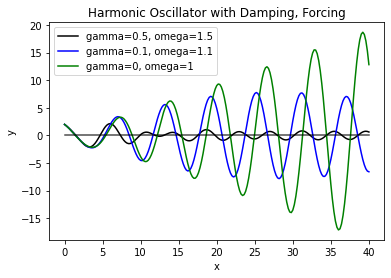

In [42]:
# Set initial variables and functions
# Because of damping and forcing, we have
#  f (x) = [x[1], -k/m*x[0]-gamma/m*x[1] + F(t)/m]

# let me define f for given spring values
def f_definer(gamma, k, m, omega):
    f = lambda x, t: np.array([x[1], 
                               1./m*(-1*k*x[0] - gamma*x[1] + 2*np.cos(omega*t))])
    return f

# initial values
x0 = np.array([2, -1])
t0 = 0
tf = 40 # final t

h = 0.2
t_span = np.linspace(t0, tf, int((tf-t0)/h)+1)

# find approximations for certain gamma, omega values
for gamma, omega, col in [(0.5, 1.5, 'k'), (0.1, 1.1, 'b'), (0, 1, 'g')]:
    f = f_definer(gamma, 2, 2, omega)
    sol1 = rk4_vector(f, x0, t_span, h)

    # plot solutions
    plt.plot(t_span, sol1[:, 0], label='gamma={}, omega={}'.format(gamma, omega), color=col)

plt.plot(t_span, 0*t_span, color='black', alpha=0.7)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Harmonic Oscillator with Damping, Forcing')
plt.show()

1
1
2
3
